In [18]:
import pandas as pd

anthropic_aae = pd.read_csv('./Complete Dataset/Claude-Haiku-AAE-sentiment.csv')
anthropic_sae = pd.read_csv('./Complete Dataset/Claude-Haiku-SAE-sentiment.csv')

gpt_aae = pd.read_csv('./Complete Dataset/GPT-4o-mini-AAE-sentiment.csv')
gpt_sae = pd.read_csv('./Complete Dataset/GPT-4o-mini-SAE-sentiment.csv')

phi_aae = pd.read_csv('./Complete Dataset/Phi-3-medium-AAE-sentiment.csv')
phi_sae = pd.read_csv('./Complete Dataset/Phi-3-medium-SAE-sentiment.csv')

## We'll use accuracy as measure of change in model's behaviour for AAE vs SAE

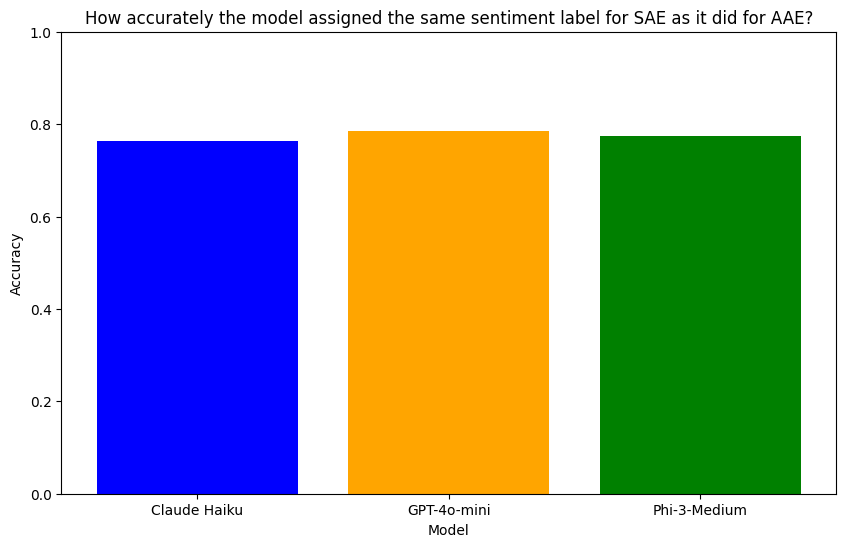

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def calculate_accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

# Compute accuracy scores
accuracies = {
    'Claude Haiku': calculate_accuracy(anthropic_aae['sentiment'], anthropic_sae['sae_labels']),
    'GPT-4o-mini': calculate_accuracy(gpt_aae['sentiment'], gpt_sae['sae_labels']),
    'Phi-3-Medium': calculate_accuracy(phi_aae['sentiment'], phi_sae['sae_labels'])
}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
models = list(accuracies.keys())
scores = list(accuracies.values())

plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('How accurately the model assigned the same sentiment label for SAE as it did for AAE?')
plt.ylim(0, 1)
plt.show()

# We need to find reason why the model is changing it's prediction for AAE vs SAE.

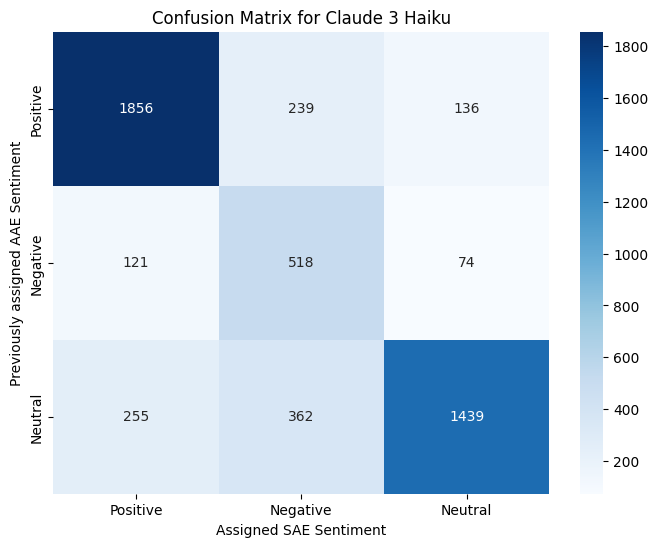

In [20]:
from sklearn.metrics import cohen_kappa_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns

# Example: Calculating Cohen's Kappa
kappa_scores = {
    'Claude Haiku': cohen_kappa_score(anthropic_aae['sentiment'], anthropic_sae['sae_labels']),
    'GPT-3.5': cohen_kappa_score(gpt_aae['sentiment'], gpt_sae['sae_labels']),
    'Phi-3': cohen_kappa_score(phi_aae['sentiment'], phi_sae['sae_labels'])
}

# Example: Class-specific F1-score, precision, recall
f1_scores = {
    'Claude Haiku': precision_recall_fscore_support(anthropic_aae['sentiment'], anthropic_sae['sae_labels'], average=None),
    'GPT-4o-mini': precision_recall_fscore_support(gpt_aae['sentiment'], gpt_sae['sae_labels'], average=None),
    'Phi-3-Medium': precision_recall_fscore_support(phi_aae['sentiment'], phi_sae['sae_labels'], average=None)
}

sentiment_classes=["Positive", "Negative", "Neutral"]

# Example: Confusion Matrix for a specific model
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(anthropic_aae['sentiment'], anthropic_sae['sae_labels'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Assigned SAE Sentiment')
plt.ylabel('Previously assigned AAE Sentiment')
plt.title('Confusion Matrix for Claude 3 Haiku')
plt.show()


#### &#8593; The above confusion matrix shows whether Claude Haiku stick to the same sentiment it assigned to AAE after SAE conversion 

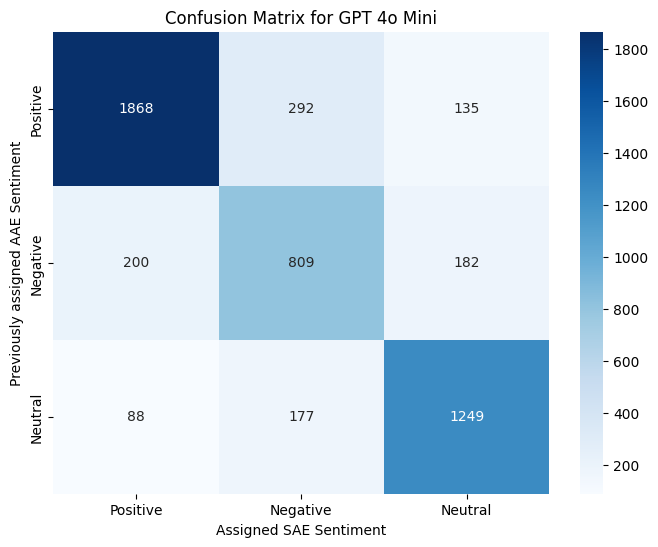

In [21]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(gpt_aae['sentiment'], gpt_sae['sae_labels'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Assigned SAE Sentiment')
plt.ylabel('Previously assigned AAE Sentiment')
plt.title('Confusion Matrix for GPT 4o Mini')
plt.show()

### 

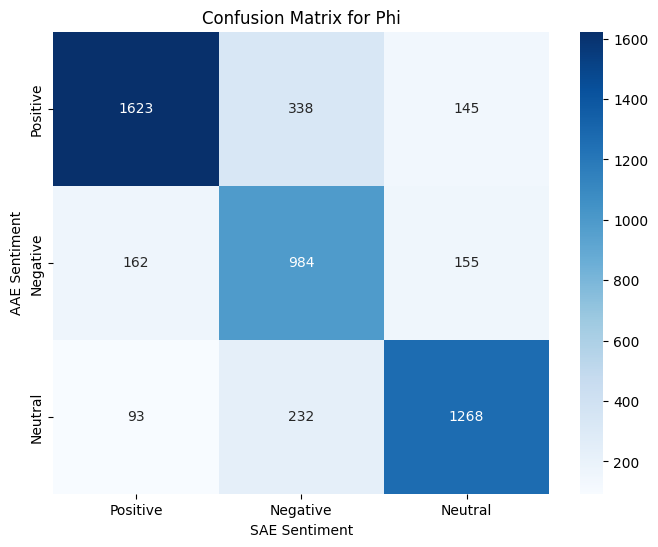

In [40]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(phi_aae ['sentiment'], phi_sae['sae_labels'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('SAE Sentiment')
plt.ylabel('AAE Sentiment')
plt.title('Confusion Matrix for Phi')
plt.show()

### Phi-3-medium has a inclination towards Negative when converted to Standard American English.

Notes: The sentiment that the model assigned to AAE, say neutral, it started assigning negative, so a point that could be made that the model thinks:
* AAE Positive vs SAE Negative: The model assume that AAE would be more rude, and when   

1. When AAE was Positive, the translation to SAE is Negative.
2. When AAE was Neutral, the translation to SAE is Negative.
3. When AAE was Neutral, translation to SAE positive.
4. When AAE was Negative, treanslation to SAE Positive.

#### &#8593; The above confusion matrix shows whether GPT 4o mini stick to the same sentiment it assigned to AAE after SAE conversion 

# AAE -> SAE -> Back to AAE, Is there a decrease or increase in accuracy?

In [34]:
anthropic_aae_from_sae = pd.read_csv('./Complete Dataset/Claude-Haiku-AAE_from_SAE-sentiment.csv')
gpt_aae_from_sae = pd.read_csv('./Complete Dataset/GPT-4o-mini-AAE_from_SAE-sentiment.csv')
phi_aae_from_sae = pd.read_csv('./Complete Dataset/Phi-3-medium-AAE_from_SAE-sentiment.csv')

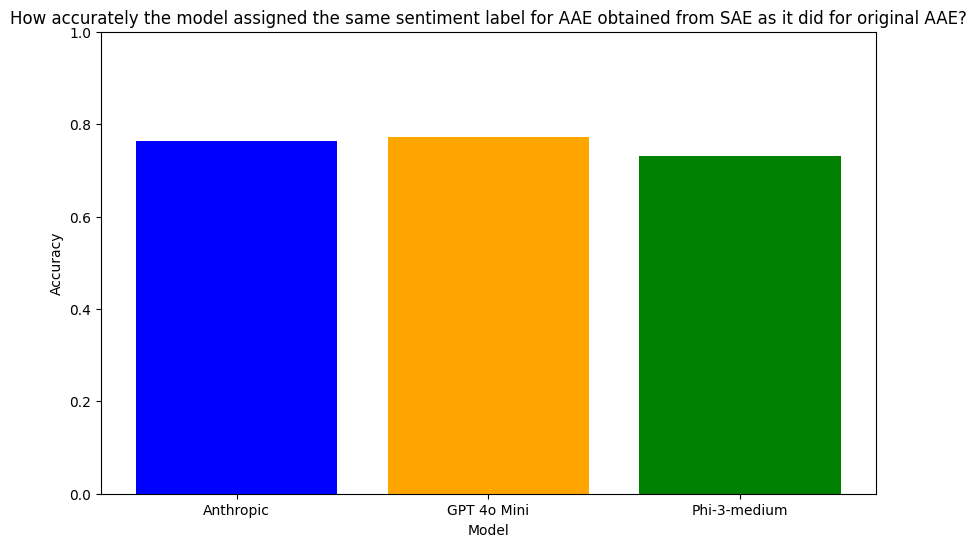

In [35]:
accuracies = {
    'Anthropic': calculate_accuracy(anthropic_aae['sentiment'], anthropic_aae_from_sae['sentiment']),
    'GPT 4o Mini': calculate_accuracy(gpt_aae['sentiment'], gpt_aae_from_sae['sentiment']),
    'Phi-3-medium': calculate_accuracy(phi_aae['sentiment'], phi_aae_from_sae['sentiment'])
}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
models = list(accuracies.keys())
scores = list(accuracies.values())

plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('How accurately the model assigned the same sentiment label for AAE obtained from SAE as it did for original AAE?')
plt.ylim(0, 1)
plt.show()

#### &#8593; The accuracy bar plot show how accurately the model assigned the same sentiment label for AAE obtained from SAE as it did for original AAE?

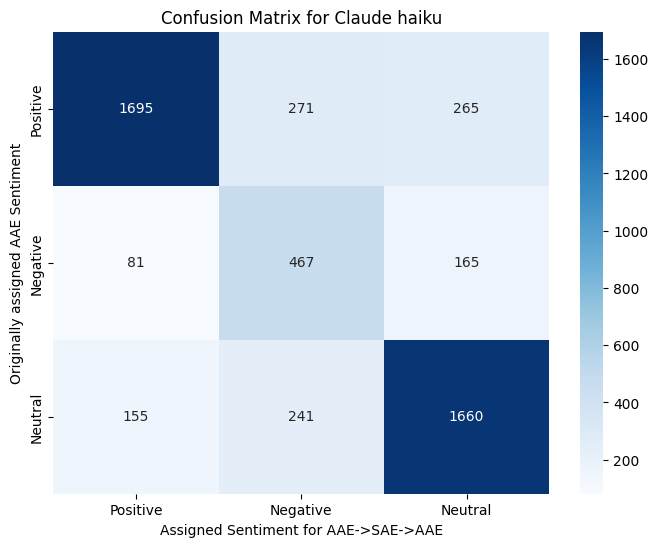

In [36]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(anthropic_aae['sentiment'], anthropic_aae_from_sae['sentiment'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Assigned Sentiment for AAE->SAE->AAE')
plt.ylabel('Originally assigned AAE Sentiment')
plt.title('Confusion Matrix for Claude haiku')
plt.show()

#### &#8593; The above confusion matrix shows whether Claude Haiku stick to the same sentiment it assigned to AAE after AAE->SAE->AAE conversion 

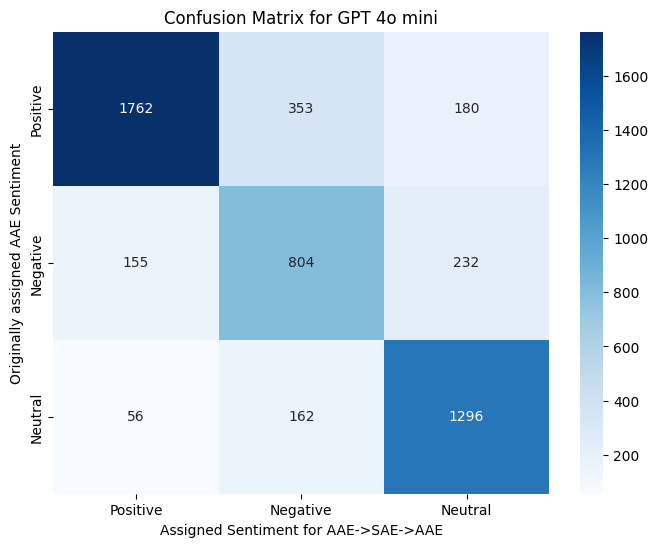

In [37]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(gpt_aae['sentiment'], gpt_aae_from_sae['sentiment'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Assigned Sentiment for AAE->SAE->AAE')
plt.ylabel('Originally assigned AAE Sentiment')
plt.title('Confusion Matrix for GPT 4o mini')
plt.show()

#### &#8593; The above confusion matrix shows whether GPT 3.5 stick to the same sentiment it assigned to AAE after AAE->SAE->AAE conversion 

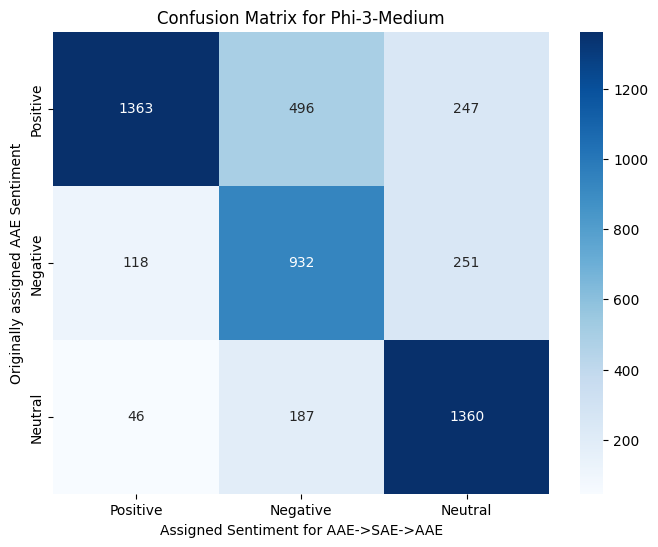

In [38]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(phi_aae['sentiment'], phi_aae_from_sae['sentiment'])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Assigned Sentiment for AAE->SAE->AAE')
plt.ylabel('Originally assigned AAE Sentiment')
plt.title('Confusion Matrix for Phi-3-Medium')
plt.show()